In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [15]:
data = pd.read_csv("dataset_finale.csv")
data.dropna(inplace=True, axis=1)
data.head()

,zone,AP_SMART25,itis-wifi2,AP_ITISLI03_5.0,AP_ITISLI02,AP_ITISLI03_2.5,itis-wifi,wifi-itis,itis-pvt,wifi-lab01,AP_SMART50
0,Aula3_0_1,-120.0,-101.2,-120.0,-120.0,-37.8,-90.6,-110.2,-110.2,-101.6,-120.0
1,Aula3_0_1,-120.0,-101.2,-120.0,-120.0,-37.8,-90.6,-120.0,-110.2,-110.6,-120.0
2,Aula3_0_1,-120.0,-91.8,-120.0,-120.0,-38.6,-98.8,-120.0,-100.4,-110.6,-120.0
3,Aula3_0_1,-120.0,-91.8,-120.0,-120.0,-39.0,-98.8,-120.0,-100.4,-100.8,-120.0
4,Aula3_0_1,-120.0,-91.8,-120.0,-120.0,-39.4,-100.4,-111.4,-89.4,-92.2,-120.0


In [16]:
features = data.columns.values
features = features[np.logical_and(features != 'zone', features != 'AP_SMART25')]
features

array(['itis-wifi2', 'AP_ITISLI03_5.0', 'AP_ITISLI02', 'AP_ITISLI03_2.5',
       'itis-wifi', 'wifi-itis', 'itis-pvt', 'wifi-lab01', 'AP_SMART50'],
      dtype=object)

In [17]:
X = data[features]
y = data["zone"]

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=1, random_state=1)

print(X_train.head())

    itis-wifi2  AP_ITISLI03_5.0  AP_ITISLI02  AP_ITISLI03_2.5  itis-wifi  \
37       -83.6           -120.0       -120.0            -55.6     -109.4   

    wifi-itis  itis-pvt  wifi-lab01  AP_SMART50  
37     -111.8     -98.4       -89.4      -120.0  


In [26]:
X_train.values

array([[ -83.6, -120. , -120. ,  -55.6, -109.4, -111.8,  -98.4,  -89.4,
        -120. ]])

In [27]:
depth = range(1,8)
train_score = []
test_score = []

for d in depth:
    net_classifier = RandomForestClassifier(max_depth=d, n_estimators=150)
    net_classifier.fit(X_train, y_train)
    train_score.append(net_classifier.score(X_train, y_train))
    test_score.append(net_classifier.score(X_test, y_test))

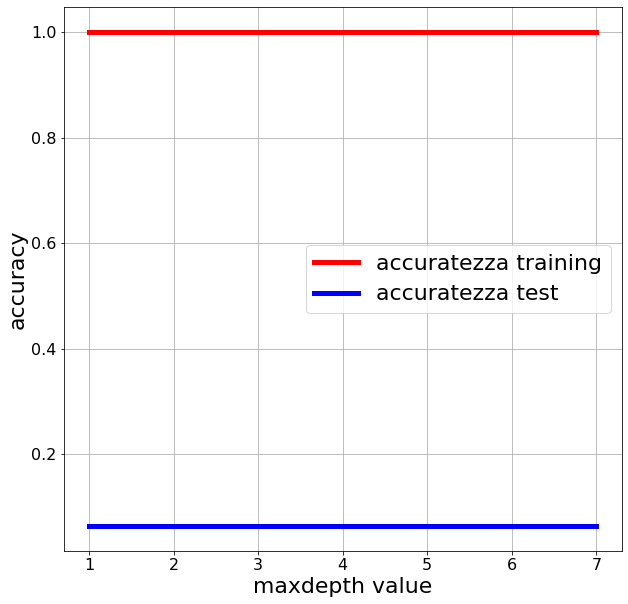

In [28]:
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(depth, train_score, color='r', label='accuratezza training', linewidth=5)
ax.plot(depth, test_score, color='b', label='accuratezza test', linewidth=5)
ax.tick_params(axis="both", labelsize=16)
ax.set_xlabel('maxdepth value', fontsize=22)
ax.set_ylabel('accuracy', fontsize=22)
ax.legend(fontsize=22)
ax.grid("both")
plt.show()

In [29]:
for i, f in enumerate(features):
    print(f"importanza di {f}: {net_classifier.feature_importances_[i]:.2f}")

importanza di itis-wifi2: 0.00
importanza di AP_ITISLI03_5.0: 0.00
importanza di AP_ITISLI02: 0.00
importanza di AP_ITISLI03_2.5: 0.00
importanza di itis-wifi: 0.00
importanza di wifi-itis: 0.00
importanza di itis-pvt: 0.00
importanza di wifi-lab01: 0.00
importanza di AP_SMART50: 0.00


In [30]:
from joblib import dump

dump(net_classifier, 'wifi_model.joblib')

['wifi_model.joblib']

In [31]:
net_classifier.predict(np.array([[-120,-120,-120,-120,-120,-63,-120,-120,-120]]))

/home/rdfilippo/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array(['Aula3_0_2'], dtype=object)

In [32]:
net_classifier.feature_names_in_

array(['itis-wifi2', 'AP_ITISLI03_5.0', 'AP_ITISLI02', 'AP_ITISLI03_2.5',
       'itis-wifi', 'wifi-itis', 'itis-pvt', 'wifi-lab01', 'AP_SMART50'],
      dtype=object)